<pre id='t1'></pre>
# How download dataset from url?

In [1]:
from urllib.request import urlretrieve

italy_covid_url = 'https://gist.githubusercontent.com/aakashns/f6a004fa20c84fec53262f9a8bfee775/raw/f309558b1cf5103424cef58e2ecb8704dcd4d74c/italy-covid-daywise.csv'

urlretrieve(italy_covid_url, 'italy-covid-daywise.csv') # download at current location

('italy-covid-daywise.csv', <http.client.HTTPMessage at 0x2ba7551a850>)

In [2]:
import pandas as pd

covid_df= pd.read_csv("italy-covid-daywise.csv")
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [3]:
covid_df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

In [4]:
covid_df.shape

(248, 4)

<pre id='t2'></pre>
# How to access one or more column?

In [5]:
# accessing one column
covid_df.new_cases

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

In [6]:
# accessing one column
covid_df['new_cases'] 

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

In [7]:
# accessing two or more column
covid_df[['new_cases', 'date']] 

,new_cases,date
0,0.0,2019-12-31
1,0.0,2020-01-01
2,0.0,2020-01-02
3,0.0,2020-01-03
4,0.0,2020-01-04
...,...,...
243,1444.0,2020-08-30
244,1365.0,2020-08-31
245,996.0,2020-09-01
246,975.0,2020-09-02


<pre id='t3'></pre>
# How to access particular row/s?

In [8]:
covid_df.loc[246] # iloc can also be used

date          2020-09-02
new_cases          975.0
new_deaths           8.0
new_tests            NaN
Name: 246, dtype: object

In [9]:
covid_df.loc[[1,246]] # iloc can also be used

,date,new_cases,new_deaths,new_tests
1,2020-01-01,0.0,0.0,NaN
246,2020-09-02,975.0,8.0,NaN


<pre id='t4'></pre>
# How to access particular row/s and column/s?

In [10]:
# method:1
covid_df['new_cases'][246]

np.float64(975.0)

In [11]:
covid_df[['new_cases', 'new_deaths']][14] # Error   

KeyError: 14

In [12]:
covid_df['new_cases', 'new_deaths'][14] # Error   

KeyError: ('new_cases', 'new_deaths')

In [13]:
# method:2
data_col2 = covid_df.iloc[246, 1]  # Syntax: [row, coulumn] where column is indexing of column which start from 0
data_col2

np.float64(975.0)

In [14]:
data_col3 = covid_df.iloc[246, 2] 
data_col3

np.float64(8.0)

In [15]:
# method:3
data_cols = covid_df.iloc[[0,246], [1,3]]  
data_cols

,new_cases,new_tests
0,0.0,NaN
246,975.0,NaN


In [16]:
# method:4
covid_df.at[246, 'new_cases'] 

np.float64(975.0)

In [17]:
# method:5
covid_df.new_cases[246]

np.float64(975.0)

<pre id='t5'></pre>
# What is loc and iloc?

`loc` (Label-based Indexing):

- loc is used for selecting data based on the labels of rows and columns.
- It allows you to select data using row and column labels rather than numeric indices.
- You can use column names and row labels to access specific data.
- The syntax is: `df.loc[row_label(s), column_label(s)]`

`iloc` (Integer-based Indexing):

- iloc is used for selecting data based on integer indices of rows and columns.
- It allows you to select data using integer positions.
- You can use numeric indices to access specific data.
- The syntax is: `df.iloc[row_index(s), column_index(s)]`

Here are some examples to illustrate the differences:

Assume you have the following DataFrame:

In [18]:
# create dataframe first

data = {'A': [1, 2, 3],
        'B': [4, 5, 6],
        'C': [7, 8, 9]}

df1 = pd.DataFrame(data, index=['X', 'Y', 'Z'])
df2 = pd.DataFrame(data)

In [19]:
df1.loc['Y', 'B']

np.int64(5)

In [20]:
df2.iloc[1, 1]

np.int64(5)

<pre id='t6'></pre>
# Copying dataframe

In [21]:
# Shallow copy

df2_shallow_copy=df2
df2_shallow_copy

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


In [22]:
df2_shallow_copy['B'][1]=99
df2_shallow_copy

C:\Users\SAURABH PRAKASH\AppData\Local\Temp\ipykernel_13804\1666830665.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df2_shallow_copy['B'][1]=99


,A,B,C
0,1,4,7
1,2,99,8
2,3,6,9


In [23]:
df2

,A,B,C
0,1,4,7
1,2,99,8
2,3,6,9


In [24]:
# Deep copy

df2_deep_copy=df2.copy()
df2_deep_copy

,A,B,C
0,1,4,7
1,2,99,8
2,3,6,9


In [25]:
df2_deep_copy['B'][2]=69
df2_deep_copy

C:\Users\SAURABH PRAKASH\AppData\Local\Temp\ipykernel_13804\1697358269.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df2_deep_copy['B'][2]=69


,A,B,C
0,1,4,7
1,2,99,8
2,3,69,9


In [26]:
df2

,A,B,C
0,1,4,7
1,2,99,8
2,3,6,9


<pre id='t7'></pre>
# Performing operation on a coulmn/s 

In [27]:
covid_df.new_deaths.sum()

np.float64(35497.0)

In [28]:
# summing on more than one columns separately
covid_df[['new_cases','new_deaths']].sum()

new_cases     271515.0
new_deaths     35497.0
dtype: float64

**Suppose i have coulmn Voulme which is in ml and i want to covert it into litre:**

In [29]:
data = {'Volume_ml': [500, 750, 1000, 250, 1250]}
df = pd.DataFrame(data)

# Convert the 'Volume_ml' column to liters
df['Volume_L'] = df['Volume_ml'] / 1000
df

,Volume_ml,Volume_L
0,500,0.50
1,750,0.75
2,1000,1.00
3,250,0.25
4,1250,1.25


<pre id='t8'></pre>
# Looking on data based of some condition (Querying)?

**Let's say we want only want to look at the days which had more than 1000 reported cases. We can use a boolean expression to check which rows satisfy this criterion.**

In [30]:
high_cases_df = covid_df[covid_df.new_cases > 1000]
high_cases_df

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


<pre id='t9'></pre>
# Inserting new coulmn in dataframe

In [31]:
covid_df['positive_rate'] = covid_df.new_cases / covid_df.new_tests
covid_df

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN


In [32]:
import pandas as pd
# Sample DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, 30, 22, 27]
}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

# Adding a new column 'Gender'
df['Gender'] = ['Female', 'Male', 'Male', 'Male']

print("\nDataFrame after inserting the 'Gender' column:")
print(df)


Original DataFrame:
      Name  Age
0    Alice   25
1      Bob   30
2  Charlie   22
3    David   27

DataFrame after inserting the 'Gender' column:
      Name  Age  Gender
0    Alice   25  Female
1      Bob   30    Male
2  Charlie   22    Male
3    David   27    Male


In [33]:
# Adding a new column 'Is_Adult' based on the 'Age' column
df['Is_Adult'] = df['Age'] >= 18
df

,Name,Age,Gender,Is_Adult
0,Alice,25,Female,True
1,Bob,30,Male,True
2,Charlie,22,Male,True
3,David,27,Male,True


# Inserting new column in dataframe at given position


In [34]:
# Using insert() Method

# Create a DataFrame
df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6]
})

# Define the new column data
new_column_data = [7, 8, 9]

# Define the column name and position
column_name = 'C'
position = 1

# Insert the new column at the specified position
df.insert(position, column_name, new_column_data)

df

,A,C,B
0,1,7,4
1,2,8,5
2,3,9,6


In [35]:
# Using Column Reordering

# Create a DataFrame
df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6]
})

# Define the new column data
new_column_data = [7, 8, 9]

# Add the new column at the end
df['C'] = new_column_data

# Reorder columns to move the new column to the desired position
column_order = ['A', 'C', 'B']  # Desired column order
df = df[column_order]

df

,A,C,B
0,1,7,4
1,2,8,5
2,3,9,6


In [36]:
# Using loc with iloc

# Create a DataFrame
df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6]
})

# Define the new column data
new_column_data = [7, 8, 9]

# Add the new column
df['C'] = new_column_data

# Reorder columns by position
cols = df.columns.tolist()
cols.insert(1, cols.pop(cols.index('C')))
df = df[cols]

df

,A,C,B
0,1,7,4
1,2,8,5
2,3,9,6


<pre id='t10'></pre>
# Removing column from dataframe

In [37]:
covid_df.drop(columns=['positive_rate'], inplace=True)
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


<pre id='t9a'></pre>
# Inserting new row in dataframe

In [67]:
# method 1

# Create a DataFrame
df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6]
})

# Append a new row
df.loc[3] = [7, 8]
df

,A,B
0,1,4
1,2,5
2,3,6
3,7,8


In [68]:
# method 1

# Create a DataFrame
df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6]
})

# Append a new row
df.loc[1] = [7, 8]
df

,A,B
0,1,4
1,7,8
2,3,6


In [69]:
# Append a new row by referencing the length of the DataFrame
df.loc[len(df)] = [13, 14]
df

,A,B
0,1,4
1,7,8
2,3,6
3,13,14


In [40]:
# method 2

# Create a new DataFrame with the new row(s)
new_rows = pd.DataFrame({
    'A': [11],
    'B': [12]
})

# Concatenate the new row(s) to the original DataFrame
df = pd.concat([df, new_rows], ignore_index=True)
df

,A,B
0,1,4
1,2,5
2,3,6
3,7,8
4,13,14
5,11,12


While the above methods work well for small DataFrames, appending rows to a DataFrame can be inefficient for large DataFrames because **DataFrames are immutable, meaning each append operation creates a new DataFrame**. For large datasets, it's better to collect rows in a list and create a DataFrame once at the end.

In [41]:
# Efficient Approach for Large DataFrames

# Collect rows in a list
rows = [{'A': 15, 'B': 16}, {'A': 17, 'B': 18}]

# Create a DataFrame from the list of rows
new_df = pd.DataFrame(rows)

# Concatenate the new DataFrame to the original DataFrame
df = pd.concat([df, new_df], ignore_index=True)
df

,A,B
0,1,4
1,2,5
2,3,6
3,7,8
4,13,14
5,11,12
6,15,16
7,17,18


# Inserting new row in dataframe at given postion

In [42]:
# Using loc and concat

# Create a DataFrame
df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6]
})

# Define the new row
new_row = {'A': 10, 'B': 20}

# Define the index at which to insert the new row
insert_index = 1

# Split the DataFrame into two parts and concatenate with the new row
df1 = df.iloc[:insert_index]
df2 = df.iloc[insert_index:]

# Convert the new row into a DataFrame
new_row_df = pd.DataFrame([new_row])

# Concatenate the parts
df = pd.concat([df1, new_row_df, df2]).reset_index(drop=True)

df

,A,B
0,1,4
1,10,20
2,2,5
3,3,6


In [70]:
# Using loc with Shifting

# Create a DataFrame
df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6]
})

# Define the new row
new_row = {'A': 10, 'B': 20}

# Define the index at which to insert the new row
insert_index = 1

# Shift the rows down from the insert_index
df.loc[insert_index+1:] = df.loc[insert_index:].shift(1)

# Insert the new row
df.loc[insert_index] = new_row

df

,A,B
0,1,4
1,10,20
2,2,5


<pre id='t10a'></pre>
# Removing row in dataframe

In [3]:
# Sample DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, 30, 22, 27]
}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

# Removing the row with index 2
df = df.drop(index=2)

Original DataFrame:
      Name  Age
0    Alice   25
1      Bob   30
2  Charlie   22
3    David   27


You can also use boolean indexing to remove rows based on a condition. For example, to remove rows where the age is less than 25:

In [4]:
df = df[df['Age'] >= 25] # This will keep only the rows where the age is greater than or equal to 25.
df

,Name,Age
0,Alice,25
1,Bob,30
3,David,27


In [5]:
df.reset_index()

,index,Name,Age
0,0,Alice,25
1,1,Bob,30
2,3,David,27


<pre id='t11'></pre>
# Replacing value 

In [46]:
covid_df.at[172, 'new_cases'] = (covid_df.at[171, 'new_cases'] + covid_df.at[173, 'new_cases'])/2
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


<pre id='t12'></pre>
# Sorting rows using column values

In [47]:
covid_df.sort_values('new_cases', ascending=False) # col and ascending can be list also

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
...,...,...,...,...
19,2020-01-19,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
5,2020-01-05,0.0,0.0,NaN
6,2020-01-06,0.0,0.0,NaN


<pre id='t13'></pre>
# Working with dates

In [48]:
covid_df.date

0      2019-12-31
1      2020-01-01
2      2020-01-02
3      2020-01-03
4      2020-01-04
          ...    
243    2020-08-30
244    2020-08-31
245    2020-09-01
246    2020-09-02
247    2020-09-03
Name: date, Length: 248, dtype: object

In [49]:
covid_df['date'] = pd.to_datetime(covid_df.date)
covid_df.date

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

**We can now extract different parts of the data into separate columns, using the DatetimeIndex class** (https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DatetimeIndex.html).

In [50]:
covid_df['year'] = pd.DatetimeIndex(covid_df.date).year
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month
covid_df['day'] = pd.DatetimeIndex(covid_df.date).day
covid_df['weekday'] = pd.DatetimeIndex(covid_df.date).weekday

In [51]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2


In [52]:
covid_df[covid_df.month == 5] # Querying or based on condition

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
122,2020-05-01,1872.0,285.0,43732.0,2020,5,1,4
123,2020-05-02,1965.0,269.0,31231.0,2020,5,2,5
124,2020-05-03,1900.0,474.0,27047.0,2020,5,3,6
125,2020-05-04,1389.0,174.0,22999.0,2020,5,4,0
126,2020-05-05,1221.0,195.0,32211.0,2020,5,5,1
127,2020-05-06,1075.0,236.0,37771.0,2020,5,6,2
128,2020-05-07,1444.0,369.0,13665.0,2020,5,7,3
129,2020-05-08,1401.0,274.0,45428.0,2020,5,8,4
130,2020-05-09,1327.0,243.0,36091.0,2020,5,9,5
131,2020-05-10,1083.0,194.0,31384.0,2020,5,10,6


<pre id='t14'></pre>
# Grouping and aggregation

**We might want to summarize the day-wise data and create a new dataframe with month-wise data. We can use the `groupby()` function to create a group for each month, select the columns we wish to aggregate, and aggregate them using the `sum()` method.**

In [53]:
covid_month_df = covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].sum()
covid_month_df

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,8217.5,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


<pre id='t15'></pre>
# Merging data from multiple sources

In [1]:
import pandas as pd

In [54]:
urlretrieve('https://gist.githubusercontent.com/aakashns/8684589ef4f266116cdce023377fc9c8/raw/99ce3826b2a9d1e6d0bde7e9e559fc8b6e9ac88b/locations.csv', 
            'locations.csv')
locations_df = pd.read_csv('locations.csv')
locations_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,3.892834e+07,64.83,0.500,1803.987
1,Albania,Europe,2.877800e+06,78.57,2.890,11803.431
2,Algeria,Africa,4.385104e+07,76.88,1.900,13913.839
3,Andorra,Europe,7.726500e+04,83.73,NaN,NaN
4,Angola,Africa,3.286627e+07,61.15,NaN,5819.495
...,...,...,...,...,...,...
207,Yemen,Asia,2.982597e+07,66.12,0.700,1479.147
208,Zambia,Africa,1.838396e+07,63.89,2.000,3689.251
209,Zimbabwe,Africa,1.486293e+07,61.49,1.700,1899.775
210,World,NaN,7.794799e+09,72.58,2.705,15469.207


In [55]:
covid_df['location'] = "Italy" # insert location coulmn with value Italy
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,location
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,Italy
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,Italy
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,Italy
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,Italy
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,Italy
...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,Italy
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,Italy
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,Italy
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,Italy


In [56]:
merged_df = covid_df.merge(locations_df, on="location")
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,Italy,Europe,60461828.0,83.51,3.18,35220.084
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,Italy,Europe,60461828.0,83.51,3.18,35220.084
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,Italy,Europe,60461828.0,83.51,3.18,35220.084
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,Italy,Europe,60461828.0,83.51,3.18,35220.084
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,Italy,Europe,60461828.0,83.51,3.18,35220.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,Italy,Europe,60461828.0,83.51,3.18,35220.084
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,Italy,Europe,60461828.0,83.51,3.18,35220.084
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,Italy,Europe,60461828.0,83.51,3.18,35220.084
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,Italy,Europe,60461828.0,83.51,3.18,35220.084


<pre id='t16'></pre>
# Writing data back to files

In [57]:
merged_df.to_csv('results.csv', index=None)

In [58]:
new_df=pd.read_csv("results.csv")
new_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,Italy,Europe,60461828.0,83.51,3.18,35220.084
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,Italy,Europe,60461828.0,83.51,3.18,35220.084
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,Italy,Europe,60461828.0,83.51,3.18,35220.084
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,Italy,Europe,60461828.0,83.51,3.18,35220.084
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,Italy,Europe,60461828.0,83.51,3.18,35220.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,Italy,Europe,60461828.0,83.51,3.18,35220.084
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,Italy,Europe,60461828.0,83.51,3.18,35220.084
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,Italy,Europe,60461828.0,83.51,3.18,35220.084
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,Italy,Europe,60461828.0,83.51,3.18,35220.084


<pre id='t17'></pre>
# Plotting using Pandas

<Axes: title={'center': 'New cases'}>

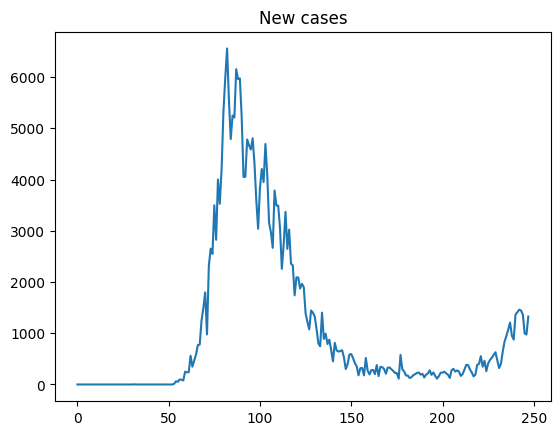

In [59]:
new_df.new_cases.plot(title='New cases', kind='line')

<Axes: title={'center': 'New cases'}>

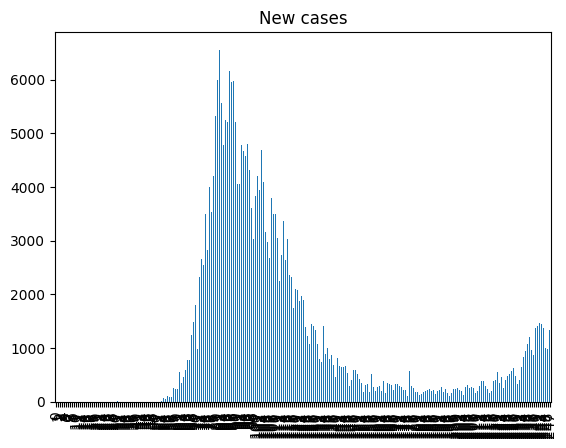

In [60]:
new_df.new_cases.plot(title='New cases', kind='bar')

# Dataframe to NumPy array

In [61]:
import pandas as pd
import numpy as np

# Create a sample DataFrame
data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Age': [25, 30, 22],
        'Salary': [50000, 60000, 75000]}

df = pd.DataFrame(data)

# Convert DataFrame to NumPy array
numpy_array = df.values

print("Original DataFrame:")
print(df)

print("\nNumPy array representation:")
print(numpy_array)
print(type(numpy_array))

Original DataFrame:
      Name  Age  Salary
0    Alice   25   50000
1      Bob   30   60000
2  Charlie   22   75000

NumPy array representation:
[['Alice' 25 50000]
 ['Bob' 30 60000]
 ['Charlie' 22 75000]]
<class 'numpy.ndarray'>


In [62]:
# another method

np_array = df.to_numpy()
np_array

array([['Alice', 25, 50000],
       ['Bob', 30, 60000],
       ['Charlie', 22, 75000]], dtype=object)